# Simple w/ plot


d:\Python\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precis

Classifier: RandomForest
  accuracy: 0.6801
  precision_macro: 0.5536
  recall_macro: 0.4865
  f1_macro: 0.4559

Classifier: SVM
  accuracy: 0.7177
  precision_macro: 0.3588
  recall_macro: 0.5000
  f1_macro: 0.4178

Classifier: KNN
  accuracy: 0.6949
  precision_macro: 0.6443
  recall_macro: 0.5330
  f1_macro: 0.5222

Classifier: NaiveBayes
  accuracy: 0.6177
  precision_macro: 0.3444
  recall_macro: 0.4586
  f1_macro: 0.3795



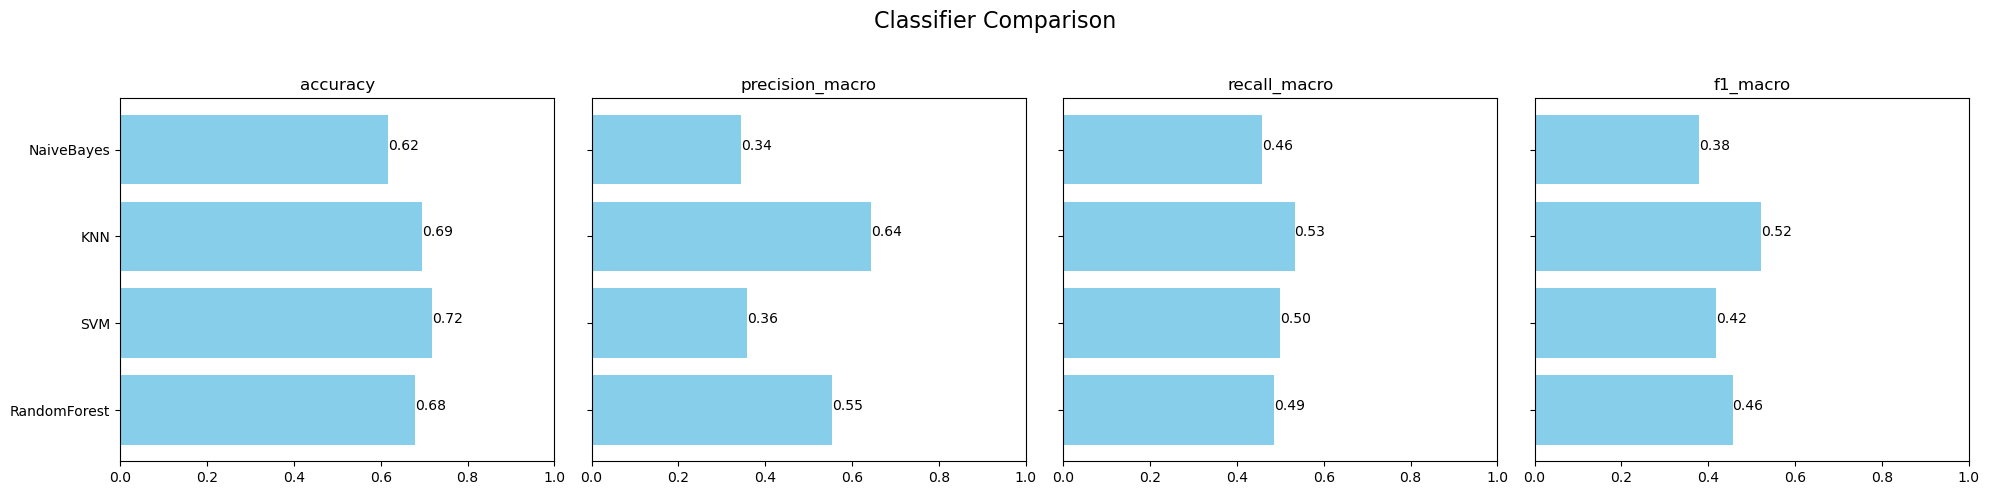

In [16]:
import matplotlib.pyplot as plt
from enum import Enum
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np


# Enums for classifier variants
class ClassifierVariant(Enum):
    RandomForest = 1
    DecisionTree = 2
    SVM = 3
    KNN = 4
    NeuralNet = 5
    NaiveBayes = 6


# Load data
data2 = np.genfromtxt("../data/labels_features.csv", delimiter=",")
data2 = data2[1:, :]

# 131 records, 105 features and 1 class each
LABELS = data2[:, 1].astype(int)  # Only class telling real / fake
FEATURES = data2[:, 2:]  # Only features, no class
TARGET_NAMES = ["Metastasis, class 0", "No metastasis, class 1"]

# Define classifiers
classifiers = {
    ClassifierVariant.RandomForest: RandomForestClassifier(n_estimators=100),
    # ClassifierVariant.DecisionTree: DecisionTreeClassifier(max_depth=5),
    ClassifierVariant.SVM: SVC(kernel="poly", probability=True),
    ClassifierVariant.KNN: KNeighborsClassifier(n_neighbors=5),
    # ClassifierVariant.NeuralNet: MLPClassifier(alpha=1, max_iter=1000),
    ClassifierVariant.NaiveBayes: GaussianNB(),
}

# Define scoring metrics
scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]


# Perform cross-validation and evaluate classifiers
def evaluate_classifiers(features, labels, classifiers, scoring):
    results = {variant: {} for variant in classifiers}
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for variant, clf in classifiers.items():
        for score in scoring:
            scores = cross_val_score(clf, features, labels, cv=skf, scoring=score)
            results[variant][score] = np.mean(scores)

    return results


# Evaluate classifiers
evaluation_results = evaluate_classifiers(FEATURES, LABELS, classifiers, scoring)

# Print evaluation results
for variant, metrics in evaluation_results.items():
    print(f"Classifier: {variant.name}")
    for metric, score in metrics.items():
        print(f"  {metric}: {score:.4f}")
    print()


# Plotting the results
def plot_evaluation_results(evaluation_results, scoring):
    n_metrics = len(scoring)
    n_classifiers = len(evaluation_results)

    fig, axes = plt.subplots(1, n_metrics, figsize=(20, 5), sharey=True)
    fig.suptitle("Classifier Comparison", fontsize=16)

    for i, metric in enumerate(scoring):
        scores = [evaluation_results[variant][metric] for variant in evaluation_results]
        classifiers_names = [variant.name for variant in evaluation_results]

        axes[i].barh(classifiers_names, scores, color="skyblue")
        axes[i].set_title(metric)
        axes[i].set_xlim(0, 1)
        for index, value in enumerate(scores):
            axes[i].text(value, index, f"{value:.2f}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Plot evaluation results
plot_evaluation_results(evaluation_results, scoring)

# TOP???


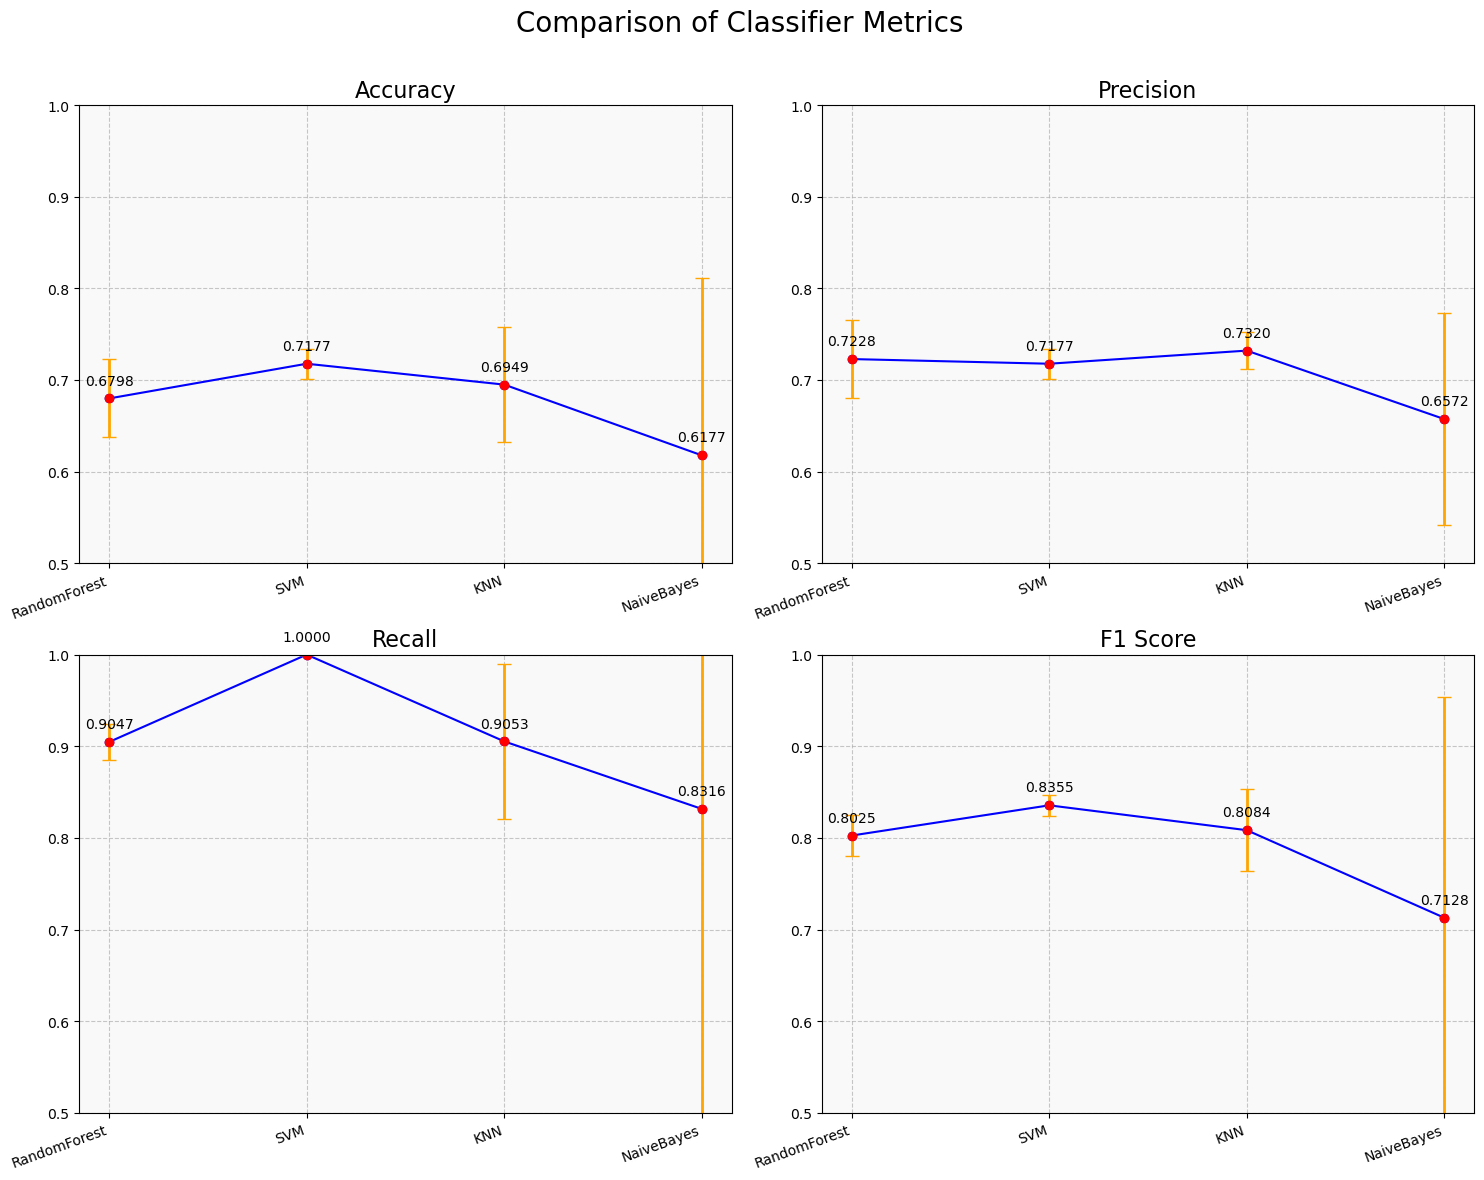

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classifiers
classifiers = {
    "RandomForest": RandomForestClassifier(n_estimators=100),
    # "DecisionTree": DecisionTreeClassifier(max_depth=5),
    "SVM": SVC(kernel="poly", probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5), # kernel: ((...) -> Any) | Literal['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
    # "NeuralNet": MLPClassifier(alpha=1, max_iter=1000),
    "NaiveBayes": GaussianNB(),
}

# Load data
data2 = np.genfromtxt("../data/labels_features.csv", delimiter=",")
data2 = data2[1:, :]  # Assuming first row is header

# Separate features and labels
LABELS = data2[:, 1].astype(int)  # Assuming class labels are in the second column
FEATURES = data2[:, 2:]  # Assuming features start from the third column

# Define target names
TARGET_NAMES = ["Metastasis, class 0", "No metastasis, class 1"]

# Initialize metrics
accuracy_scores = {name: [] for name in classifiers}
precision_scores = {name: [] for name in classifiers}
recall_scores = {name: [] for name in classifiers}
f1_scores = {name: [] for name in classifiers}

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(FEATURES, LABELS):
    X_train, X_test = FEATURES[train_index], FEATURES[test_index]
    y_train, y_test = LABELS[train_index], LABELS[test_index]

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Calculate metrics
        accuracy_scores[name].append(accuracy_score(y_test, y_pred))
        precision_scores[name].append(precision_score(y_test, y_pred))
        recall_scores[name].append(recall_score(y_test, y_pred))
        f1_scores[name].append(f1_score(y_test, y_pred))

# Calculate mean and standard deviation for each classifier
mean_accuracy = {name: np.mean(scores) for name, scores in accuracy_scores.items()}
std_accuracy = {name: np.std(scores) for name, scores in accuracy_scores.items()}
mean_precision = {name: np.mean(scores) for name, scores in precision_scores.items()}
std_precision = {name: np.std(scores) for name, scores in precision_scores.items()}
mean_recall = {name: np.mean(scores) for name, scores in recall_scores.items()}
std_recall = {name: np.std(scores) for name, scores in recall_scores.items()}
mean_f1 = {name: np.mean(scores) for name, scores in f1_scores.items()}
std_f1 = {name: np.std(scores) for name, scores in f1_scores.items()}


def SetUpSubPlot(axs, classifiers, metrics, std_devs, title):
    xAxisLabels = list(classifiers.keys())
    windowsCount = range(len(xAxisLabels))

    axs.plot(windowsCount, metrics, marker="o", linestyle="-", color="b", label=title)
    axs.errorbar(
        windowsCount,
        metrics,
        yerr=std_devs,
        fmt="o",
        color="red",
        ecolor="orange",
        elinewidth=2,
        capsize=5,
        label="Standard Deviation",
    )

    axs.set_xticks(windowsCount)
    axs.set_xticklabels(xAxisLabels, rotation=20, ha="right")

    axs.set_title(title, fontsize=16)
    axs.grid(True, linestyle="--", alpha=0.7)

    for i, value in enumerate(metrics):
        axs.annotate(
            f"{value:.4f}",
            (windowsCount[i], value),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
        )

    if np.mean(metrics) <= 1:
        axs.set_ylim(0.5, 1)
    axs.set_facecolor("#f9f9f9")

    return axs


# Plot overall comparison
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

metrics = [
    list(mean_accuracy.values()),
    list(mean_precision.values()),
    list(mean_recall.values()),
    list(mean_f1.values()),
]
std_devs = [
    list(std_accuracy.values()),
    list(std_precision.values()),
    list(std_recall.values()),
    list(std_f1.values()),
]
titles = ["Accuracy", "Precision", "Recall", "F1 Score"]

for i, (ax, metric, std_dev, title) in enumerate(
    zip(axs.flatten(), metrics, std_devs, titles)
):
    SetUpSubPlot(ax, classifiers, metric, std_dev, title)

plt.tight_layout()
fig.suptitle("Comparison of Classifier Metrics", fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()